## Merve TUTAR 1901022050

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def mypgmread(filename):
    
    with open(filename, 'rb') as f:
        
        # Dosyanın ilk iki baytınının "P5" olup olmadığını kontrol et
        magic_number = f.readline().decode('ascii').strip()
        assert magic_number == 'P5', 'Invalid PGM'

        
        while True:
            #Dosyadan bir satır oku, ASCII karakterlere çevir, başındaki ve sonundaki boşlukları temizle
            line = f.readline().decode('ascii').strip()
            if not line.startswith('#'):# Yorum satırlarını atla
                break

        # Genişlik, yükseklik ve maksimum değeri oku
        
        width, height = map(int, line.split()) #line adındaki stringi boşluk karakterlerine göre ayırır bu ayrılmış liste üzerinde int fonksiyonunu her bir elemana uygula
        maxval = int(f.readline().decode('ascii').strip())

        image_data = []#Görüntü verisini depolamak için liste oluştur
        
        for _ in range(height):
            row = []
            for _ in range(width):
                pixel_value = ord(f.read(1))#Dosyadan bir bayt oku ve ASCII değere dönüştür
                row.append(pixel_value)
            image_data.append(row)

        return image_data, width, height, maxval

## Figure 3.20

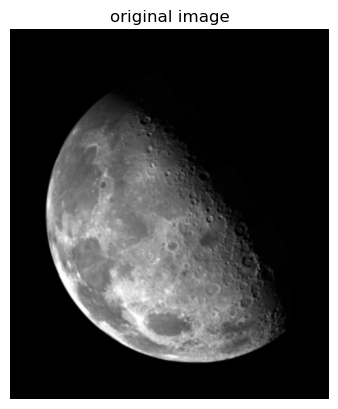

In [3]:
image_data, width, height, maxval = mypgmread('Fig0338(a)(blurry_moon).pgm')
plt.title("original image")
plt.imshow(image_data, cmap='gray')
plt.axis('off') 
plt.show()


In [58]:
def my_laplacian(data,size,width,height,matrix):

    data = np.array(data,dtype=np.uint8)
    
    padding = size // 2  # Ekstra sütun/satır sayısı, filtre boyutunun yarısı kadar

    #görüntü kenarındaki pikselleri korumak için 
    w = np.zeros((height + 2*padding, width + 2*padding))# w-> görüntü verisini çerçeveler filtre size ına göre 
    
    for i in range(0,height):    
        for j in range(0,width):
            w[i + padding][j + padding] = data[i][j]
            

    filtered = np.zeros((height,width))
    sharpened = np.zeros((height,width))


    for i in range(0,height):
        for j in range(0,width):
            
            filtered[i][j] =filtered[i][j]+ int(np.sum(w[i:size+i,j:size+j]*matrix))#filtrelenmiş görüntü verisini tutar
            
            sharpened[i][j]= data[i][j] - filtered[i][j]
          
   
    if np.sum(matrix) != 0:
        filtered = np.round(filtered / np.sum(matrix)).astype(int)
        
    return filtered,sharpened
    

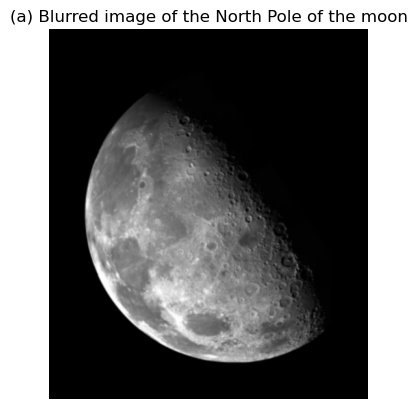

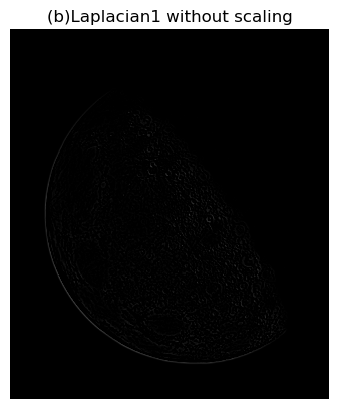

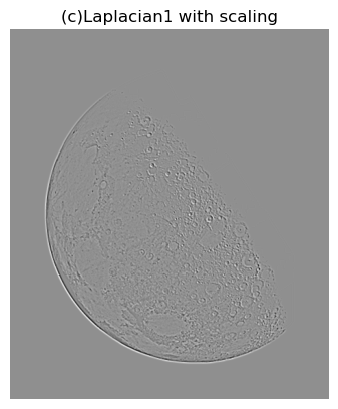

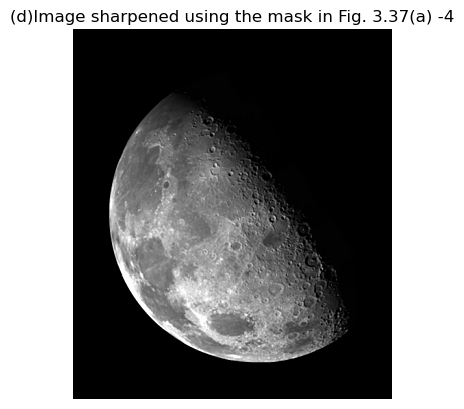

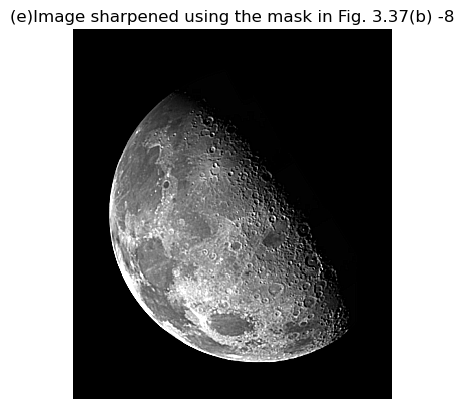

In [74]:
image_data, width, height, maxval = mypgmread('Fig0338(a)(blurry_moon).pgm')

plt.title("(a) Blurred image of the North Pole of the moon")
plt.imshow(image_data, cmap='gray',vmin=0,vmax=255)
plt.axis('off') 
plt.show()

lp_matrix1=np.array([[0,1,0],
                    [1,-4,1],
                    [0,1,0]])

lp_matrix2=np.array([[1,1,1],
                     [1,-8,1],
                     [1,1,1]])



filtre1,sharp1=my_laplacian(image_data,3,width, height,lp_matrix1)


min_value = np.min(filtre1) #  filtre sonuçlarının minimum değeri
max_value = np.max(filtre1) # filtre sonuçlarının maksimum değeri

# Ölçeklendirme işlemi
scaled_filtered = (filtre1 - min_value) / (max_value - min_value) * 255

plt.title("(b)Laplacian1 without scaling")
plt.imshow(filtre1, cmap='gray',vmin=0,vmax=255)
plt.axis('off') 
plt.show()

plt.title("(c)Laplacian1 with scaling")
plt.imshow(scaled_filtered, cmap='gray')
plt.axis('off') 
plt.show()

plt.title("(d)Image sharpened using the mask in Fig. 3.37(a) -4")
plt.imshow(sharp1, cmap='gray', vmin=0 , vmax=255)
plt.axis('off') 
plt.show()

filtre2,sharp2=my_laplacian(image_data,3,width, height,lp_matrix2)


plt.title("(e)Image sharpened using the mask in Fig. 3.37(b) -8")
plt.imshow(sharp2, cmap='gray', vmin=0 , vmax=255)
plt.axis('off') 
plt.show()



2. maske ( Kitapta Fig 3.37(b) lp_matrix2=np.array([[1,1,1],[1,-8,1],[1,1,1]]))  kullanıldığında görüntü daha çok keskinleştirilmiştir. Scaling işlemi de görüntünün grileşmesini sağlamıştır.

## Figure 3.40

In [6]:
def my_gaussian(size, sigma):

    if size % 2 == 0:
        return 'size error'
    
    coordinat = np.arange(-(size // 2), size // 2 + 1)
    
    # merkezden uzaklıkları oluştur
    X, Y = np.meshgrid(coordinat, coordinat)
    
    # gauss weightleri hesapla
    weight = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    
    return weight

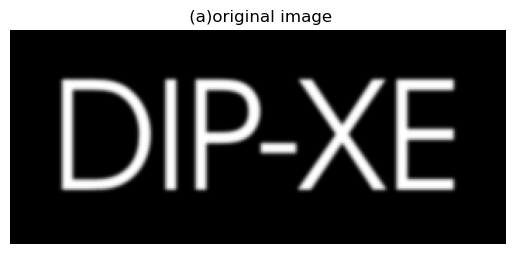

In [7]:
image_data, width, height, maxval = mypgmread('Fig0340(a)(dipxe_text).pgm')
plt.figure()
plt.title(" (a)original image")
plt.imshow(image_data, cmap='gray')
plt.axis('off') 
plt.show()


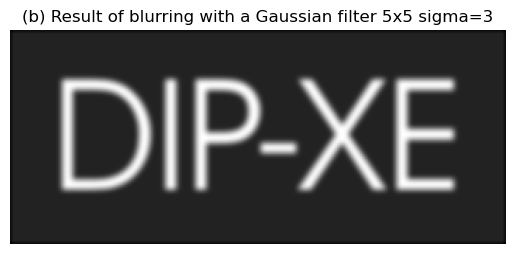

In [8]:
plt.figure()
gauss=my_gaussian(5,3)
filtre1,sharp1=my_laplacian(image_data,5,width, height,gauss)
plt.title("(b) Result of blurring with a Gaussian filter 5x5 sigma=3")
plt.imshow(filtre1, cmap='gray')
plt.axis('off') 
plt.show()


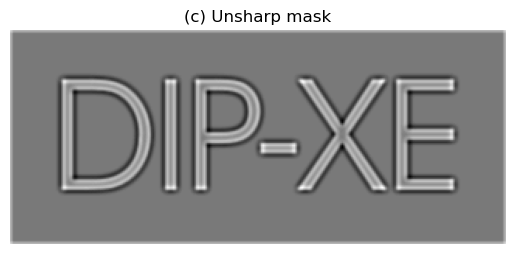

In [9]:
plt.figure()
unsharp=image_data-filtre1
plt.title("(c) Unsharp mask")
plt.imshow(unsharp, cmap='gray')
plt.axis('off') 
plt.show()


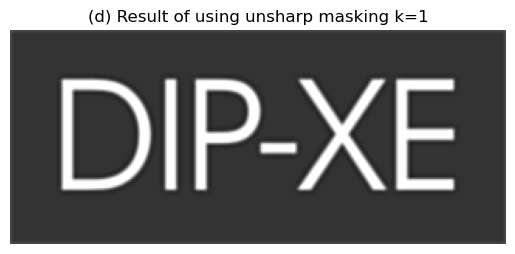

In [10]:
k = 1
unsharpedImage = image_data + k * unsharp
plt.title("(d) Result of using unsharp masking k=1")
plt.imshow(unsharpedImage, cmap='gray',vmin=0, vmax=255)
plt.axis('off') 
plt.show()

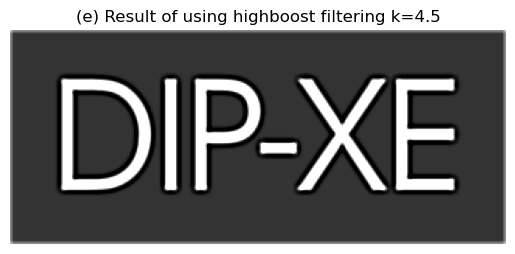

In [11]:
k = 4.5
highboost= image_data + k * unsharp
plt.title("(e) Result of using highboost filtering k=4.5")
plt.imshow(highboost, cmap='gray',vmin=0, vmax=255)
plt.axis('off') 
plt.show()

### keskinleştirmeyi arttırmak için k değerini arttırabiliriz, aşağıda keskinleştirme görüntüde bir miktar bozulmaya sebep olacak kadar değeri arttırılmıştır

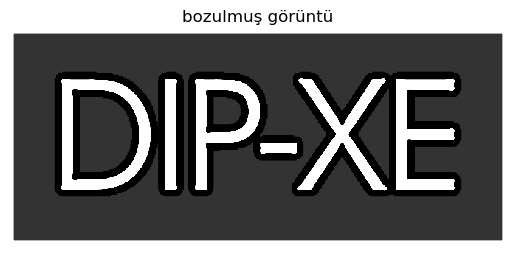

In [17]:
k = 100
highboost= image_data + k * unsharp
plt.title("bozulmuş görüntü")
plt.imshow(highboost, cmap='gray',vmin=0, vmax=255)
plt.axis('off') 
plt.show()

## Figure 3.20

## DARK IMAGE

In [27]:
def my_histogram_calc(image):
    
    histogramVector, _ = np.histogram(image.flatten(), bins=np.arange(maxval + 2))

     # PDF hesapla
    pdfVector = histogramVector / np.sum(histogramVector)

    # CDF hesapla
    cdfVector = np.cumsum(pdfVector)

    # CDF vectorünü scale et
    equalizedVector = np.round(cdfVector * 255)

    fig, axs = plt.subplots(1, 3, figsize=(14, 4))
   
    # orjinal dark görüntüyü çizdir
    axs[0].imshow(image, cmap="gray", vmin=0, vmax=255)
    axs[0].set_title('original image')

    # orjinal görüntünün histogramını çizdir
    axs[1].stem(histogramVector, linefmt='-', markerfmt='None', basefmt='')
    axs[1].set_title('Histogram of original image')
    axs[1].set_xlabel('Pixel Values')
    axs[1].set_ylabel('Pixel Number')   

    # orjinal görüntünün CDF i çizdir
    axs[2].plot(cdfVector)
    axs[2].set_title('CDF of original image')
    axs[2].set_xlabel('Pixel Values')
    axs[2].set_ylabel('Pixel Number')
    
    plt.tight_layout()
    plt.show()

    #------------------------------------------------------------------------------------------------
    
    equalizedMatrix = equalizedVector[image]

    # equalized görüntünün histogram
    newHistogramVector, _ = np.histogram(equalizedMatrix.flatten(), bins=np.arange(maxval + 2))

    # PDF hesapla
    pdfVector = newHistogramVector / np.sum(newHistogramVector)

    # CDF hesapla
    cdfVector = np.cumsum(pdfVector)


    fig, axs = plt.subplots(1, 3, figsize=(14, 4))

    # dark görüntünün equalized hali
    axs[0].imshow(equalizedMatrix, cmap="gray", vmin=0, vmax=255)
    axs[0].set_title('equalized image')

    # equalized görüntünün histogram görüntüsü
    axs[1].stem(newHistogramVector, linefmt='-', markerfmt='None', basefmt='')
    axs[1].set_title('Histogram of equalized image')
    axs[1].set_xlabel('Pixel Values')
    axs[1].set_ylabel('Pixel Number')

    # equalized görüntünün CDF i çizdir
    axs[2].plot(cdfVector)
    axs[2].set_title('CDF of equalized image')
    axs[2].set_xlabel('Pixel Values')
    axs[2].set_ylabel('Pixel Number')

    
    plt.tight_layout()
    plt.show()

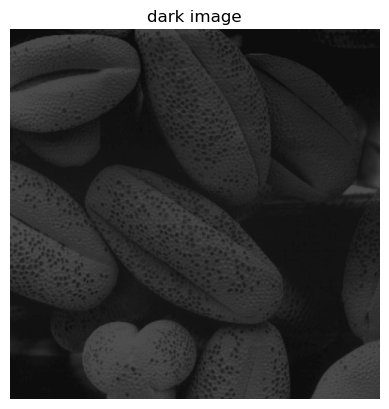

In [28]:
image_data, width, height, maxval = mypgmread('Fig0320(4)(bottom_left).pgm')
plt.title("dark image")
plt.imshow(image_data, cmap='gray',vmin=0, vmax=255)
plt.axis('off') 
plt.show()

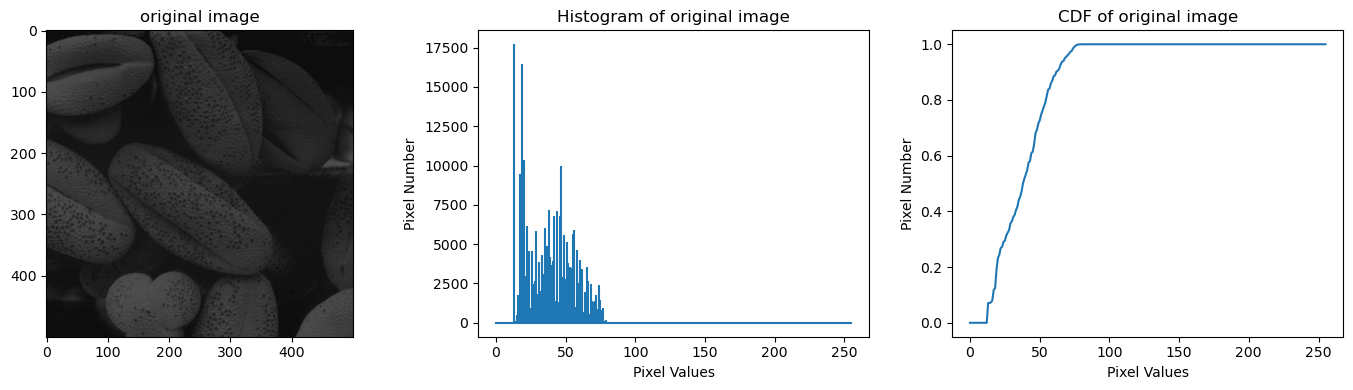

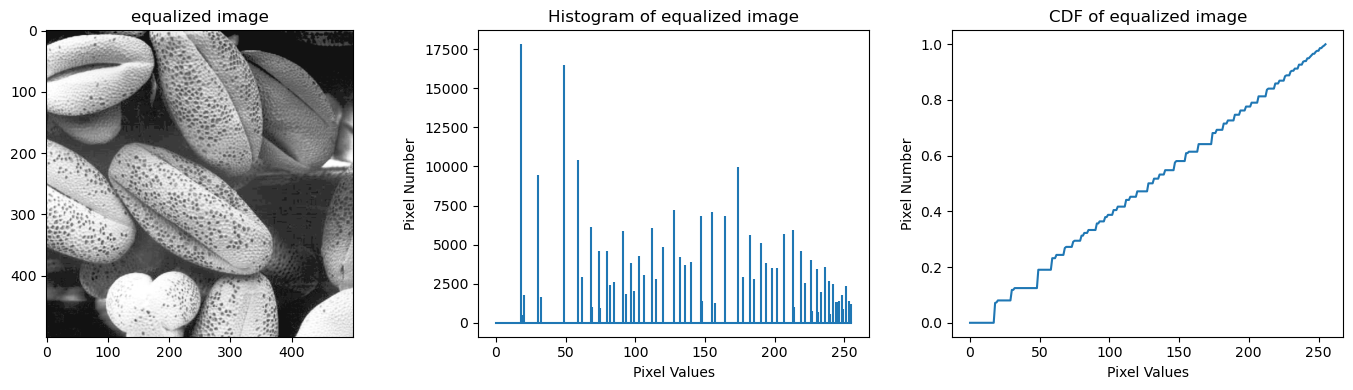

In [29]:
image = np.array(image_data, dtype=np.uint8)# numpy dizisine çevir
my_histogram_calc(image)

## LIGHT IMAGE

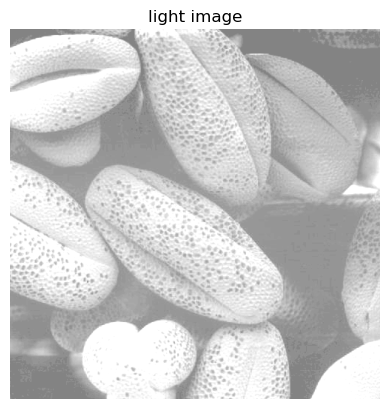

In [30]:
image_data, width, height, maxval = mypgmread('Fig0320(1)(top_left).pgm')
plt.title("light image")
plt.imshow(image_data, cmap='gray',vmin=0, vmax=255)
plt.axis('off') 
plt.show()

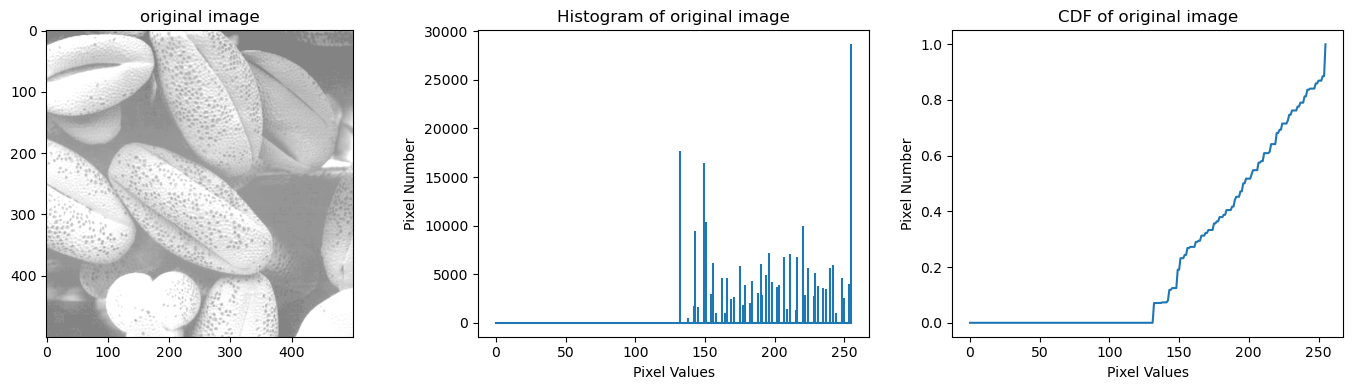

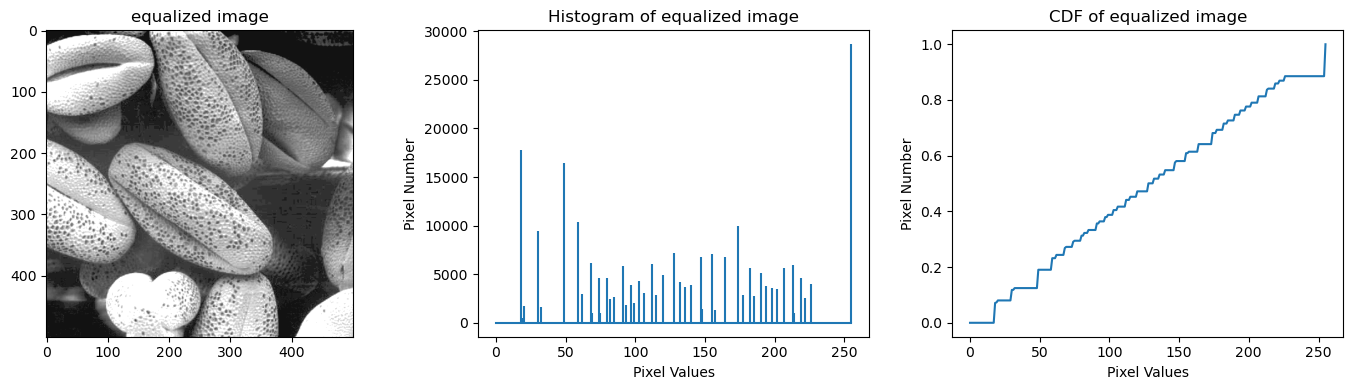

In [31]:
image = np.array(image_data, dtype=np.uint8)# numpy dizisine çevir
my_histogram_calc(image)

## LOW-CONTRAST IMAGE

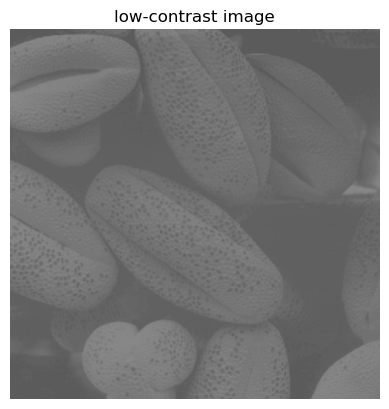

In [32]:
image_data, width, height, maxval = mypgmread('Fig0320(2)(2nd_from_top).pgm')
plt.title("low-contrast image")
plt.imshow(image_data, cmap='gray',vmin=0, vmax=255)
plt.axis('off') 
plt.show()

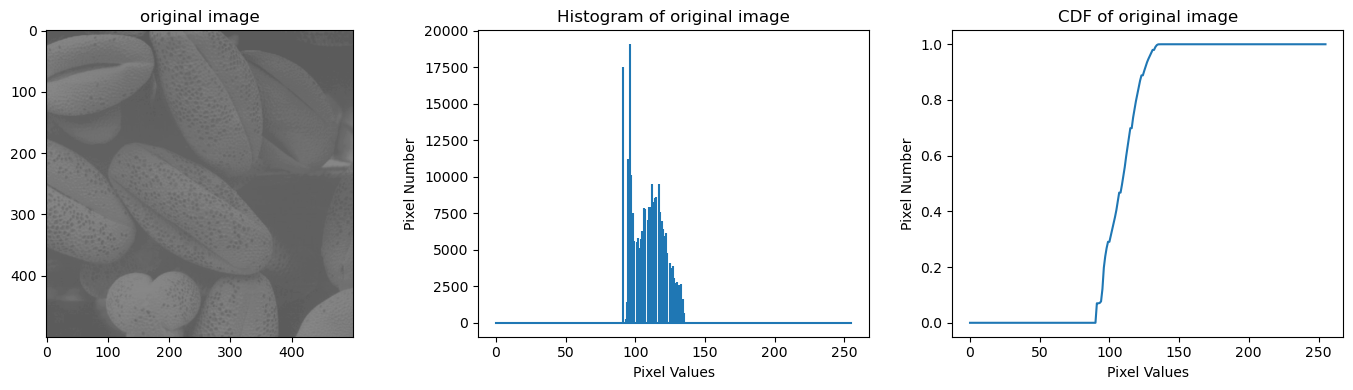

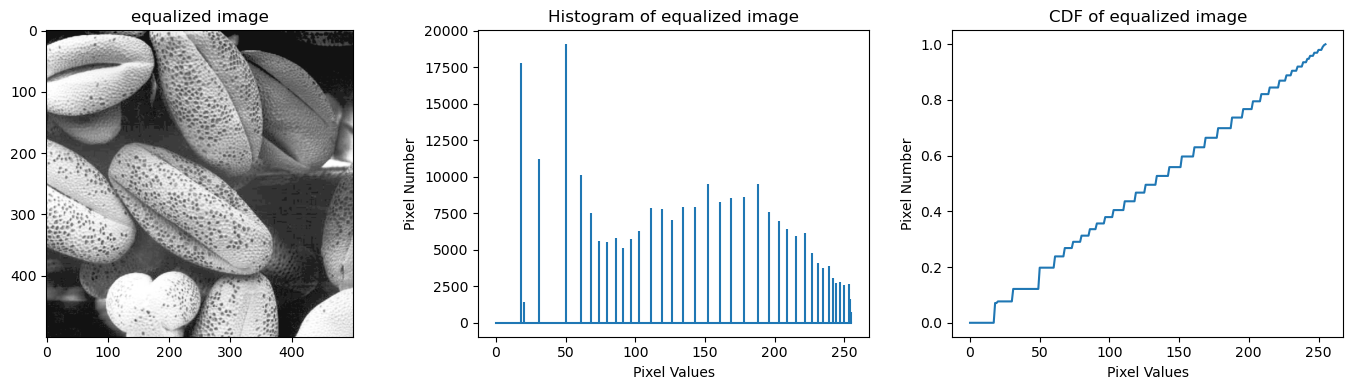

In [33]:
image = np.array(image_data, dtype=np.uint8)# numpy dizisine çevir
my_histogram_calc(image)

## HIGH-CONTRAST IMAGE

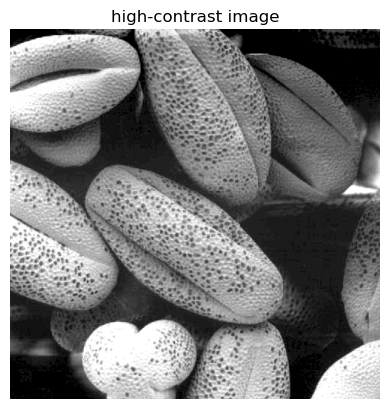

In [34]:
image_data, width, height, maxval = mypgmread('Fig0320(3)(third_from_top).pgm')
plt.title("high-contrast image")
plt.imshow(image_data, cmap='gray',vmin=0, vmax=255)
plt.axis('off') 
plt.show()

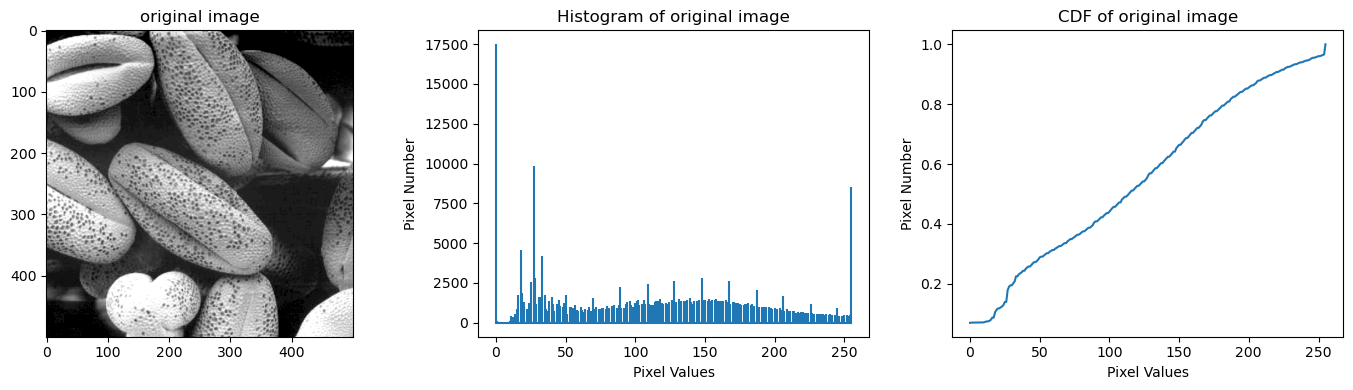

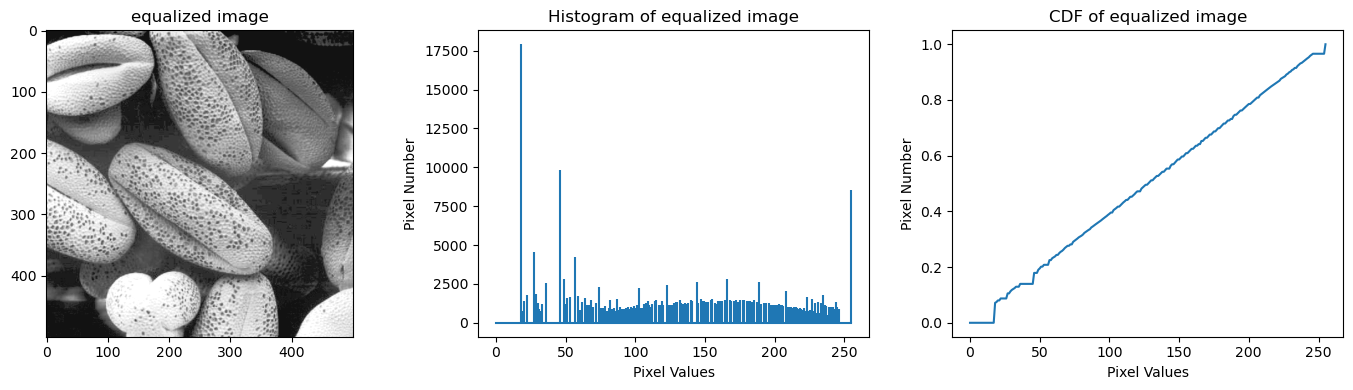

In [35]:
image = np.array(image_data, dtype=np.uint8)# numpy dizisine çevir
my_histogram_calc(image)

Orjinal görüntülerin cdf ve histogram grafiklerini yorumlayacak olursak; 
1. dark görüntünün cdf inde düşük piksel değerleri (0' a yakın) yoğunluktadır. Bu sebeple görüntüdeki renkler siyaha çok yakındır.

2. light görüntüde piksel değerleri 127 ve 255 arasında yoğunlaşmıştır. Görüntü gri renklidir.

3. low-contrast görüntüde piksel değerleri çoğunlukla 100 değerindedir. Bir önceki light görüntüye göre daha karanlıktır.

4. high-contrast görüntüde CDF grafiğinin doğrusal olduğu görülmektedir. Çünkü piksel değerleri uniform dağılmıştır.

Normalize edilmiş görüntüler incelendiğinde ise hepsinde yine pikseller uniform dağılmış ve CDF grafiklerindeki değerler doğrusal artış göstermiştir. Görüntüler incelendiğinde birbirine çok yakın oldukları görülmektedir.